# Практическая работа №1: Исследование двумерного нормального распределения

Выполнил студент гр. 2364 Лебедев Андрей Вадимович. Вариант №9

## Цель работы

Исследовать свойства двумерного случайного вектора имеющего нормальное распределение, овладеть навыками преобразования нормального вектора в стандартный и в вектор с независимыми компонентами.

## Основные теоретические положения

Случайный вектор $\vec{\xi} = \left(\xi_1, \xi_2,...,\xi_n \right)^T : \Omega \rightarrow \mathbb{R}^n $ имеет **многомерное номальное распределение**, если существует вектор независимых стандартных нормальных случайных величин $\vec{\tau} = \left(\tau_1, ..., \tau_m \right)^T $, вещественный вектор $\vec{\mu} = \left(\mu_1, ... ,\mu_n \right)^T $ и нулевая матрица $ A $ размерности $n \times m$, такие, что $\vec{\xi} = A\vec{\tau} + \mu $

$\xi \sim \mathcal{N}(\mu, \Sigma)$

$\mu = \mathbb{E}\vec{\xi} = \left(\mathbb{E}\xi_1, \mathbb{E}\xi_2, ..., \mathbb{E}\xi_n \right)^T $ - вектор математических ожиданий

$\Sigma = \left(\sigma_{ij} \right)_{1 \leq i,j \leq n} , \sigma_{i,j} = cov\left(\xi_i,\xi_j \right)$ - матрица ковариаций

$\rho_{\vec{\xi}} \left(x_1,...,x_n \right) = \cfrac{1}{\left(2\pi \right)^\cfrac{n}{2} \sqrt{det\Sigma}} \exp \left(-\cfrac{1}{2} \left(\vec{X} - \mu \right)^T \Sigma^{-1} \left(\vec{X} - \mu \right) \right)$

$\vec{x} = (x_1,x_2,...,x_n)^T$

## Постановка задачи

Плотность двумерного нормального распредления имеет вид:

$ \rho_{\xi,\eta}\left( x,y \right) = C \cdot exp\left( -\frac{1}{2}\left( 3x^2 - 3xy + 7y^2 + 3x + 11y + 7 \right)\right); $

Для заданного двумерного нормального вектора необходимо вычислить числовые характеристики и выполнить заданные преобразования. Полученные результаты содержательно проинтерпретировать.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Выполнение работы

1. Вычислить вектор математических ожиданий и ковариационные характеристики данного случайного вектора. Построить график плотности  распределения $ \rho_{\xi,\eta}$.

Упростим выражение в показателе степени экспоненты:


$ 3x^2 - 3xy + 7y^2 + 3x + 11y + 7 = 3\left(x^2 - xy + 0.25y \right) + 6.25y^2 + 3x + 11y + 7 = 3\left(x-0.5y\right)^2 + 6.25y^2 + 3\left(x-0.5y\right)+12.5y+7 = $

$  3\left( \left(x - 0.5y\right) + 0.5\right)^2 + 6.25\left(y+1\right)^2= 3\left(x+1\right)^2 - 3\left(x+1\right)\left(y+1\right)+7\left(y+1\right)^2 $

Матрица математический ожиданий:


$\mathbb{E} \begin{pmatrix} \xi\\ \eta \end{pmatrix} = \begin{pmatrix} -1\\ -1 \end{pmatrix};$

Обратная матрица ковариаций:

$ \Sigma^{-1} = \begin{pmatrix} 3 & -1.5\\ -1.5 & 7 \end{pmatrix}$

Найдем матрицу ковариаций:


$det(\Sigma^{-1}) = 3\cdot 7 - 1.5^2 = \cfrac{75}{4}$

$\Sigma = \cfrac{75}{4} \begin{pmatrix} 7 & 1.5\\ 1.5 & 3 \end{pmatrix}$

Найдем коэффициент $ C $:

$С = \cfrac{1}{\left(2\pi \right)^{\cfrac{n}{2}} \sqrt{det\Sigma}} = \cfrac{1}{2\pi\sqrt{\cfrac{4}{75}}} = \cfrac{5\sqrt{3}}{4\pi}$

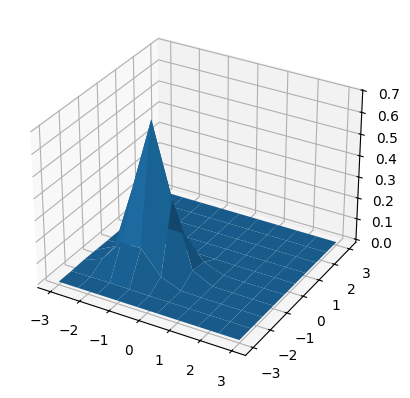

In [5]:
figure = plt.figure()
graph = figure.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10))

z = ((5*math.sqrt(3))/(4 * math.pi))*math.e**(-0.5 * (3*x**2-3*x*y+7*y**2+3*x+11*y+7))

graph.plot_surface(x, y, z)
plt.show()

2. Найти аффинное преобразование, переводящее исходный случайный вектор в стандартный нормальный.

$\begin{pmatrix} \xi_{st} \\ \eta_{st} \end{pmatrix} = M \cdot \begin{pmatrix} \xi \\ \eta \end{pmatrix} + \vec{b}$

$3\left(\left(x-0.5y \right)+ 0.5 \right)^2 + 6.25\left(y+1 \right)^2 = \left(\sqrt{3}x - \cfrac{\sqrt{3}}{2}y + \cfrac{\sqrt{3}}{2}\right) ^ 2 + \left(2.5y+2.5 \right)^2$

$M = \begin{pmatrix} \xi \\ \eta \end{pmatrix} = \begin{pmatrix} \sqrt{3}\xi - \cfrac{\sqrt{3}}{2}\eta \\ 0\xi + 2.5\eta \end{pmatrix}$

3. Найти ортогональное преобразование, переводящее соответствующий центрированный случайный вектор в вектор с независимыми компонентами. Построить график плотности полученного распределения.

$\Sigma^{-1} = \begin{pmatrix} 3 & -1.5 \\ -1.5 & 7 \end{pmatrix} - \vec{\lambda} = \begin{pmatrix} 3 - \lambda & -1.5 \\ -1.5 & 7 - \lambda \end{pmatrix} $

$ det\left(\Sigma \right) = \left(3 - \lambda\right)\left(7 - \lambda \right) - \cfrac{9}{4} = 0 \Rightarrow \lambda^2 - 10\lambda + 21 - \cfrac{9}{4} = 0 \Rightarrow \lambda^2 - 10\lambda + 18.75 = 0$

$D = 25; \sqrt{D} = \sqrt{25} = 5$

$\lambda_1 = \cfrac{15}{2}$

$\lambda_2 = \cfrac{5}{2}$

$\lambda_1:$

$\begin{pmatrix} -4.5 & -1.5 \\ -1.5 & -0.5 \end{pmatrix} \begin{pmatrix} x_1\\x_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0\end{pmatrix}$

$\begin{pmatrix} x_1\\x_2 \end{pmatrix} = \lambda \begin{pmatrix} 1\\-3 \end{pmatrix} \Rightarrow \lambda = \cfrac{1}{\sqrt{1+(-3)^2}} \begin{pmatrix} 1\\-3 \end{pmatrix} = \cfrac{1}{\sqrt{10}} \begin{pmatrix} 1\\-3 \end{pmatrix}$

$\lambda_2:$

$\begin{pmatrix} 0.5 & -1.5 \\ -1.5 & 4.5 \end{pmatrix} \begin{pmatrix} x_3\\x_4 \end{pmatrix} = \begin{pmatrix} 0 \\ 0\end{pmatrix}$

$\begin{pmatrix} x_3\\x_4 \end{pmatrix} = \lambda \begin{pmatrix} 3\\1 \end{pmatrix} \Rightarrow \lambda = \cfrac{1}{\sqrt{1+(3)^2}} \begin{pmatrix} 3\\1 \end{pmatrix} = \cfrac{1}{\sqrt{10}} \begin{pmatrix} 3\\1 \end{pmatrix}$

$ Q^T = \cfrac{1}{\sqrt{10}} \begin{pmatrix} 1 & 3\\-3 & 1 \end{pmatrix}; Q = \cfrac{1}{\sqrt{10}} \begin{pmatrix} 1 & -3\\3 & 1 \end{pmatrix} $

$ \Sigma_{id} = Q\Sigma Q^T  = \cfrac{1}{10} \cfrac{4}{75} \begin{pmatrix} 3 & 1\\1 & -3 \end{pmatrix} \cdot \begin{pmatrix} 7 & 1.5\\ 1.5 & 3 \end{pmatrix} \cdot \begin{pmatrix} 3 & 1\\1 & -3 \end{pmatrix} = \begin{pmatrix} \cfrac{2}{15} & 0\\ 0 & \cfrac{2}{5} \end{pmatrix} = \begin{pmatrix} \cfrac{1}{\lambda_1} & 0\\ 0 & \cfrac{1}{\lambda_2} \end{pmatrix}  $

In [37]:
matrix3 = np.dot(np.array([[1,-3],[3,1]],dtype = float), np.array([[7,1.5],[1.5,3]],dtype = float))
matrix4 = np.dot(matrix3,np.array([[1,3],[-3,1]], dtype = float))
matrix5 = 4/(750) * matrix4
matrix5_det = np.linalg.det(matrix5)
matrix5_inv = np.linalg.inv(matrix5)
matrix5_inv

array([[7.5, 0. ],
       [0. , 2.5]])

$\rho_{\vec{\xi}} \left(x,y \right) = \cfrac{1}{\left(2\pi \right)^\cfrac{n}{2} \sqrt{det\Sigma}} \exp \left(-\cfrac{1}{2} \left(\vec{X} - \mu \right)^T \Sigma^{-1} \left(\vec{X} - \mu \right) \right) =\cfrac{1}{2\pi \sqrt{\cfrac{4}{75}}} \exp\left(-\cfrac{1}{2} \left(x + 1,y + 1 \right) \begin{pmatrix} 7.5 & 0 \\ 0 & 2.5 \end{pmatrix} \begin{pmatrix} x+1 \\ y+1 \end{pmatrix} \right) = \cfrac{1}{2\pi \sqrt{\cfrac{4}{75}}} \exp\left(-\cfrac{1}{2}\left(7.5x^2 + 15x + 2.5y^2 + 5y \right)\right) $

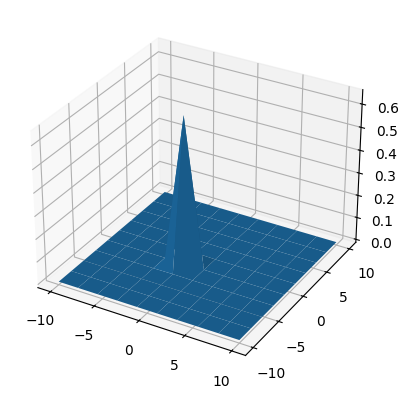

In [3]:
figure2 = plt.figure()
graph2 = figure2.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-10, 10, 10), np.linspace(-10, 10, 10))

z = (1/(2 * math.pi * math.sqrt(4/75)))*math.e**(-0.5 * (7.5*x**2+15*x+2.5*y**2+5*y+10))

graph2.plot_surface(x, y, z)
plt.show()

4. Вычислить характеристики совместного распределения случайного вектора $\left(\xi + 2\eta, 4\xi - 5\eta \right)^T$ и записать его плотность. Построить график плотности полученного распределения.

$\vec{V} = \begin{pmatrix} \xi + 2\eta\\ 4\xi - 5\eta \end{pmatrix}; \vec{V} \sim \mathcal{N}\left(\mu, \Sigma_V \right)$, 


где $\mu = \mathbb{E}\vec{V}$ - вектор математических ожиданий, $\Sigma$ - матрица ковариаций

$D = \begin{pmatrix} 1 & 2\\ 4 & -5 \end{pmatrix}$

$\mathbb{E}_V = \mu_V = D \cdot \mathbb{E} = \begin{pmatrix} 1 & 2\\ 4 & -5 \end{pmatrix} \cdot \begin{pmatrix} -1 \\ -1 \end{pmatrix} = \begin{pmatrix} -3 \\ 1\end{pmatrix} $

In [23]:
result_matrix =np.dot( np.array([[1,2],[4,-5]]), np.array([[-1],[-1]]))
result_matrix

array([[-3],
       [ 1]])

$\Sigma_V = D\Sigma D^T =\cfrac{4}{75}  \begin{pmatrix} 1 & 2\\ 4 & -5 \end{pmatrix} \cdot \begin{pmatrix} 7 & 1.5\\ 1.5 & 3 \end{pmatrix} \cdot  \begin{pmatrix} 1 & 4\\ 2 & -5 \end{pmatrix} = \begin{pmatrix} \cfrac{4}{3} & \cfrac{2}{15} \\ \cfrac{2}{15}  & \cfrac{508}{75} \end{pmatrix}  $

In [21]:
matrix1 = np.dot( np.array([[1,2],[4,-5]]), np.array([[7,1.5],[1.5,3]]))
matrix2 = np.dot(matrix1, np.array([[1,4],[2,-5]]))
result = 4/75 * matrix2
result

array([[1.33333333, 0.13333333],
       [0.13333333, 6.77333333]])

$\rho_{\vec{V}}\left(v_1,v_2 \right) = \cfrac{1}{\left(2\pi \right)^{\cfrac{n}{2}}\sqrt{det\Sigma_V}} \exp\left(-\cfrac{1}{2}\left(\vec{V} -\mu_V \right)\Sigma^{-1}_V \left(\vec{V} - \mu_V\right) \right) = \cfrac{1}{2\pi\sqrt{9\cfrac{1}{75}}} \exp\left(-\cfrac{1}{2}\cfrac{1}{169}\begin{pmatrix} x+3 \\ y -1 \end{pmatrix}^T \begin{pmatrix} 127 & -2.5 \\ -2.5 & 25 \end{pmatrix} \begin{pmatrix} x+3 \\ y -1 \end{pmatrix} \right) = \cfrac{1}{2\pi\sqrt{9\cfrac{1}{75}}} \exp\left(-\cfrac{1}{2}\cfrac{1}{169} \left(127x^2 - 5yx + 753x + 25y^2 - 65y + 1162 \right) \right) $

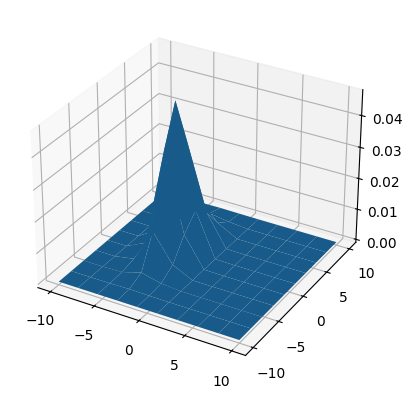

In [24]:
figure1 = plt.figure()
graph1 = figure1.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-10, 10, 10), np.linspace(-10, 10, 10))

z = (1/(2 * math.pi * math.sqrt(676/75)))*math.e**(-0.5*1/169 * (127*x**2-5*x*y+753*x+25*y**2-65*y+1162))

graph1.plot_surface(x, y, z)
plt.show()

In [23]:
determinate = np.linalg.det(result)
print(determinate)
result_obr = np.linalg.inv(result)
print(result_obr)

9.013333333333334
[[ 0.75147929 -0.0147929 ]
 [-0.0147929   0.14792899]]


5. Найти условное распределение $\xi$ при условии $\eta$. Вычислить $\mathbb{E}\left(\xi \vert \eta \right)$ и $\mathbb{D}\left(\xi \vert \eta \right)$.

Нормальное распределение для одномерной случайной величины: $ \cfrac{1}{\sigma\sqrt{2\pi}} \exp \left(-\cfrac{1}{2}\left(\cfrac{x-m}{\sigma} \right)^2 \right)$, где $m$ - математическое ожидание, $\sigma$ - среднее квадратичное отклонение

$\sigma = \sqrt{\mathbb{D}}$, Дисперсию мы можем найти из матрицы ковариаций из п.1. 

$\mathbb{D}_\eta = \cfrac{4}{25}$ 

$\mathbb{E}_\eta = -1$

$\rho_{\xi\vert\eta = y_0}(x) = \cfrac{\rho_{\xi,\eta}(x,y_0)}{\rho_\eta\left(y_0\right)} = \cfrac{\cfrac{5\sqrt{3}}{4\pi} \cdot \exp\left(-\cfrac{1}{2}\left(3x^2 - 3xy_0 + 7y_0^2 + 3x + 11y_0 +7 \right) \right)}{\cfrac{1}{\sqrt{\cfrac{4}{25}} \sqrt{2\pi}}  \cdot \exp \left(-\cfrac{1}{2} \left(\cfrac{y_0 + 1}{\sqrt{\cfrac{4}{25}}} \right)^2 \right)} = \cfrac{\sqrt{3}}{\sqrt{2\pi}} \cdot \exp \left(-\cfrac{1}{2} \left(3x^2 - 3xy_0+ 3x + \cfrac{3}{4}y_0^2 - \cfrac{3}{2}y_0 + \cfrac{3}{4} \right) \right) = \cfrac{\sqrt{3}}{\sqrt{2\pi}} \cdot \exp \left(-\cfrac{1}{2} \left(3x^2 - 3x\left(y_0 - 1\right) + \cfrac{3}{4} \left(y_0^2 - 2y_0 + 1 \right) \right) \right) = \cfrac{\sqrt{3}}{\sqrt{2\pi}} \cdot \exp \left(-\cfrac{1}{2} \cdot 3 \left(x^2 - x\left(y_0 - 1 \right) + \cfrac{1}{4}\left(y_0 - 1 \right)^2 \right) \right) = \cfrac{\sqrt{3}}{\sqrt{2\pi}} \cdot \exp \left(-\cfrac{1}{2} \left(\cfrac{x - \cfrac{1}{2} \left(y_0 - 1 \right)}{\left(\cfrac{1}{\sqrt{3}}\right)} \right) ^2  \right) $

Из данного уравнения можем найти дисперсию и математическое ожидание:

$\mathbb{D}\left(\xi \vert \eta \right) = \sigma ^2  = \left(\cfrac{1}{\sqrt{3}}\right)^2 = \cfrac{1}{3}$

$\mathbb{E}\left(\xi \vert \eta \right) = \cfrac{y_0 - 1}{2}$

## Выводы

В результате выполнения данной работы были исследованы свойства двумерного случайного вектора имеющего нормальное распределение,  удалось овладеть навыками преобразования нормального вектора в стандартный и в вектор с независимыми компонентами. Были построены графики плотности распределения случайных векторов, которые показывают, как часто случайная величина появляется в окрестности точки. Также, было найдено аффинное преобразование, переводящее вектор в стандартный нормальный, то есть тот, который является перепендикулярным к плоскости.